In [53]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from datetime import datetime

In [54]:
# Set working directory
dir = "C:/Users/Alexander/Documents/GitHub/PassiveSensing-Symptoms-NetworkAnalysis"
os.chdir(dir)

# Load Data
# Self report: 2018 and 2019 baseline
selfreport_2018_2019 = pd.read_csv(os.path.join(dir, "data", "IHSdata_20182019_03062024.csv"))

# 2018: sensor (activity and sleep), self-report: baseline, Q1Q2, Q3, Q4
c2018_step_sleep_mood_daily_BL = pd.read_csv(os.path.join(dir, "data/2018", "US_step_sleep_mood_daily_2018cohort_BL.csv"))
c2018_step_sleep_mood_daily_Q1Q2 = pd.read_csv(os.path.join(dir, "data/2018", "US_step_sleep_mood_daily_2018cohort_Q1Q2.csv"))
c2018_step_sleep_mood_daily_Q3 = pd.read_csv(os.path.join(dir, "data/2018", "US_step_sleep_mood_daily_2018cohort_Q3.csv"))
c2018_step_sleep_mood_daily_Q4 = pd.read_csv(os.path.join(dir, "data/2018", "US_step_sleep_mood_daily_2018cohort_Q4.csv"))

# 2019: sensor (activity and sleep), self-report: baseline, Q1Q2, Q3, Q4
c2019_step_sleep_mood_daily_BLQ1 = pd.read_csv(os.path.join(dir, "data/2019", "Step_sleep_mood_daily_2019_BLQ1.csv"))
c2019_step_sleep_mood_daily_Q2 = pd.read_csv(os.path.join(dir, "data/2019", "Step_sleep_mood_daily_2019_Q2.csv"))
c2019_step_sleep_mood_daily_Q3 = pd.read_csv(os.path.join(dir, "data/2019", "Step_sleep_mood_daily_2019_Q3.csv"))
c2019_step_sleep_mood_daily_Q4 = pd.read_csv(os.path.join(dir, "data/2019", "Step_sleep_mood_daily_2019_Q4.csv"))

# Data Cleaning & Preprocessing
# Check UserIDs who answered "Yes" (1) to Q1 of C-SSRS questionnaire
ssrs_wish = selfreport_2018_2019[
    selfreport_2018_2019[['ssrs_wish1', 'ssrs_wish2', 'ssrs_wish3', 'ssrs_wish4']].eq(1).any(axis=1)
][['UserID', 'Year', 'ssrs_wish1', 'ssrs_wish2', 'ssrs_wish3', 'ssrs_wish4']]

# Summary of ssrs_wish
ssrs_wish_summ = pd.melt(ssrs_wish, id_vars=['UserID', 'Year'], 
                        value_vars=['ssrs_wish1', 'ssrs_wish2', 'ssrs_wish3', 'ssrs_wish4'])
ssrs_wish_summ['wish_dead'] = ssrs_wish_summ['value'].map({1: 'Yes', 2: 'No'})
ssrs_wish_summ = ssrs_wish_summ.groupby(['Year', 'variable', 'wish_dead']).size().reset_index(name='n')
ssrs_wish_summ = ssrs_wish_summ.sort_values('wish_dead')

# Check UserIDs who answered "Yes" (1) to Q2 of C-SSRS questionnaire
ssrs_kill = selfreport_2018_2019[
    (selfreport_2018_2019['Year'] == 2018) &
    selfreport_2018_2019[['ssrs_kill1', 'ssrs_kill2', 'ssrs_kill3', 'ssrs_kill4']].eq(1).any(axis=1)
][['UserID', 'Year', 'ssrs_kill1', 'ssrs_kill2', 'ssrs_kill3', 'ssrs_kill4']]

# Summary of ssrs_kill
ssrs_kill_summ = pd.melt(ssrs_kill, id_vars=['UserID', 'Year'],
                        value_vars=['ssrs_kill1', 'ssrs_kill2', 'ssrs_kill3', 'ssrs_kill4'])
ssrs_kill_summ['thought_killing'] = ssrs_kill_summ['value'].map({1: 'Yes', 2: 'No'})
ssrs_kill_summ = ssrs_kill_summ.groupby(['Year', 'variable', 'thought_killing']).size().reset_index(name='n')
ssrs_kill_summ = ssrs_kill_summ.sort_values('thought_killing')

# Daily sensor data processing
# Baseline
c2018_step_sleep_mood_daily_BL['METRIC_START_DATE'] = pd.to_datetime(c2018_step_sleep_mood_daily_BL['METRIC_START_DATE'])
c2018_daily_BL = (c2018_step_sleep_mood_daily_BL
    .rename(columns={
        'STUDY_PRTCPT_ID': 'UserID',
        'STEP_COUNT': 'step',
        'SLEEP_COUNT': 'sleep',
        'MOOD': 'mood',
        'METRIC_START_DATE': 'date'
    })
    .assign(quarter='BL')
    .drop(columns=['METRIC_END_DATE', 'STUDY_ID'])
)

# Q1 and Q2
c2018_step_sleep_mood_daily_Q1Q2['METRIC_START_DATE'] = pd.to_datetime(c2018_step_sleep_mood_daily_Q1Q2['METRIC_START_DATE'])
c2018_daily_Q1Q2 = (c2018_step_sleep_mood_daily_Q1Q2
    .rename(columns={
        'STUDY_PRTCPT_ID': 'UserID',
        'STEP_COUNT': 'step',
        'SLEEP_COUNT': 'sleep',
        'MOOD': 'mood',
        'METRIC_START_DATE': 'date'
    })
    .assign(
        month_start=lambda x: x['date'].dt.strftime('%b'),
        quarter=lambda x: np.where(x['month_start'].isin(['Jul', 'Aug', 'Sep']), 'Q1', 'Q2')
    )
    .drop(columns=['METRIC_END_DATE', 'STUDY_ID', 'month_start'])
)

# Q3
c2018_step_sleep_mood_daily_Q3['METRIC_START_DATE'] = pd.to_datetime(c2018_step_sleep_mood_daily_Q3['METRIC_START_DATE'])
c2018_daily_Q3 = (c2018_step_sleep_mood_daily_Q3
    .rename(columns={
        'STUDY_PRTCPT_ID': 'UserID',
        'STEP_COUNT': 'step',
        'SLEEP_COUNT': 'sleep',
        'MOOD': 'mood',
        'METRIC_START_DATE': 'date'
    })
    .assign(quarter='Q3')
    .drop(columns=['METRIC_END_DATE', 'STUDY_ID'])
)

# Q4
c2018_step_sleep_mood_daily_Q4['METRIC_START_DATE'] = pd.to_datetime(c2018_step_sleep_mood_daily_Q4['METRIC_START_DATE'])
c2018_daily_Q4 = (c2018_step_sleep_mood_daily_Q4
    .rename(columns={
        'STUDY_PRTCPT_ID': 'UserID',
        'STEP_COUNT': 'step',
        'SLEEP_COUNT': 'sleep',
        'MOOD': 'mood',
        'METRIC_START_DATE': 'date'
    })
    .assign(quarter='Q4')
    .drop(columns=['METRIC_END_DATE', 'STUDY_ID'])
)

# 2018 - Combine all quarterly data
c2018_BL_Q1_Q2_Q3_Q4 = pd.concat([
    c2018_daily_BL, 
    c2018_daily_Q1Q2, 
    c2018_daily_Q3, 
    c2018_daily_Q4
]).sort_values(['UserID', 'quarter']).reset_index(drop=True)

# 2019 - Combine all quarterly data
c2019_BL_Q1_Q2_Q3_Q4 = pd.concat([
    c2019_step_sleep_mood_daily_BLQ1,
    c2019_step_sleep_mood_daily_Q2,
    c2019_step_sleep_mood_daily_Q3,
    c2019_step_sleep_mood_daily_Q4
]).sort_values(['UserID', 'quarter']).reset_index(drop=True)

# The final datasets are now available in:
# c2018_BL_Q1_Q2_Q3_Q4
# c2019_BL_Q1_Q2_Q3_Q4

C:\Users\Alexander\AppData\Local\Temp\ipykernel_15168\3416760280.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  c2018_step_sleep_mood_daily_BL['METRIC_START_DATE'] = pd.to_datetime(c2018_step_sleep_mood_daily_BL['METRIC_START_DATE'])
C:\Users\Alexander\AppData\Local\Temp\ipykernel_15168\3416760280.py:63: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  c2018_step_sleep_mood_daily_Q1Q2['METRIC_START_DATE'] = pd.to_datetime(c2018_step_sleep_mood_daily_Q1Q2['METRIC_START_DATE'])
C:\Users\Alexander\AppData\Local\Temp\ipykernel_15168\3416760280.py:80: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, pleas

In [78]:
c2018_BL_Q1_Q2_Q3_Q4

,UserID,step,sleep,mood,date,quarter
0,400070,0,0,10,2018-05-02,BL
1,400070,0,0,7,2018-05-08,BL
2,400070,0,0,7,2018-05-03,BL
3,400070,0,0,8,2018-05-05,BL
4,400070,0,0,8,2018-05-07,BL
...,...,...,...,...,...,...
432248,499998,3672,442,10,2019-06-25,Q4
432249,499998,34533,365,0,2019-06-26,Q4
432250,499998,0,0,10,2019-06-28,Q4
432251,499998,3106,0,0,2019-06-27,Q4


In [55]:
c2018_BL_Q1_Q2_Q3_Q4.UserID.nunique()
c2019_BL_Q1_Q2_Q3_Q4.UserID.nunique()


1712

In [42]:
# First, let's identify zero records and total records per UserID and quarter
zero_records = (c2018_BL_Q1_Q2_Q3_Q4[
    (c2018_BL_Q1_Q2_Q3_Q4['step'] == 0) | 
    (c2018_BL_Q1_Q2_Q3_Q4['sleep'] == 0) | (c2018_BL_Q1_Q2_Q3_Q4['mood'] == 0)
].groupby(['UserID', 'quarter']).size().reset_index(name='zero_count'))

total_records = c2018_BL_Q1_Q2_Q3_Q4.groupby(['UserID', 'quarter']).size().reset_index(name='total_count')

# Merge zero_records and total_records
comparison = zero_records.merge(total_records, on=['UserID', 'quarter'])

# Find UserID-quarter combinations where all records are zeros
problematic_records = comparison[comparison['zero_count'] == comparison['total_count']]

# Remove these records from the original dataset
clean_data = c2018_BL_Q1_Q2_Q3_Q4.merge(
    problematic_records[['UserID', 'quarter']], 
    on=['UserID', 'quarter'], 
    how='left', 
    indicator=True
).query('_merge == "left_only"').drop('_merge', axis=1)

# Print summary
print(f"Original dataset shape: {c2018_BL_Q1_Q2_Q3_Q4.shape}")
print(f"Clean dataset shape: {clean_data.shape}")
print(f"\nNumber of UserID-quarter combinations removed: {len(problematic_records)}")
print("\nUserID-quarter combinations removed:")
print(problematic_records[['UserID', 'quarter']])

Original dataset shape: (432253, 6)
Clean dataset shape: (355699, 6)

Number of UserID-quarter combinations removed: 3269

UserID-quarter combinations removed:
      UserID quarter
3     400070      Q4
6     400082      Q2
7     400082      Q3
8     400082      Q4
9     400083      BL
...      ...     ...
8589  499859      Q2
8592  499890      Q2
8601  499982      Q3
8602  499982      Q4
8605  499998      Q2

[3269 rows x 2 columns]


In [56]:
# quarterly_averages = clean_data.groupby(['quarter', 'UserID'])[['step', 'sleep', 'mood']].mean().round(2)
# quarterly_averages.sleep.hist()


In [ ]:
# First identify UserIDs that have all zeros in any quarter
zero_records = (c2018_BL_Q1_Q2_Q3_Q4[
    (c2018_BL_Q1_Q2_Q3_Q4['step'] == 0) | 
    (c2018_BL_Q1_Q2_Q3_Q4['sleep'] == 0) | (c2018_BL_Q1_Q2_Q3_Q4['mood'] == 0)
].groupby(['UserID', 'quarter']).size().reset_index(name='zero_count'))

total_records = c2018_BL_Q1_Q2_Q3_Q4.groupby(['UserID', 'quarter']).size().reset_index(name='total_count')

# Merge and find problematic UserIDs
comparison = zero_records.merge(total_records, on=['UserID', 'quarter'])
problematic_users = comparison[comparison['zero_count'] == comparison['total_count']]['UserID'].unique()

# Drop these users from the dataset
c2018_BL_Q1_Q2_Q3_Q4_cl = c2018_BL_Q1_Q2_Q3_Q4[~c2018_BL_Q1_Q2_Q3_Q4['UserID'].isin(problematic_users)]

# Print summary
print(f"Number of users with all-zero quarters: {len(problematic_users)}")
print(f"Original dataset shape: {c2018_BL_Q1_Q2_Q3_Q4.shape}")
print(f"Clean dataset shape: {c2018_BL_Q1_Q2_Q3_Q4_cl.shape}")
print("\nUserIDs dropped:")
print(problematic_users)

Number of users with all-zero quarters: 1529
Original dataset shape: (432253, 6)
Clean dataset shape: (206187, 6)

UserIDs dropped:
[400070 400082 400083 ... 499890 499982 499998]


In [35]:
c2018_BL_Q1_Q2_Q3_Q4_cl

,UserID,step,sleep,mood,date,quarter
621,400226,0,0,8,2018-06-03,BL
622,400226,0,0,8,2018-06-04,BL
623,400226,0,0,5,2018-06-05,BL
624,400226,0,0,7,2018-06-07,BL
625,400226,0,0,8,2018-06-06,BL
...,...,...,...,...,...,...
431536,499944,24588,457,9,2019-06-25,Q4
431537,499944,6341,421,0,2019-06-26,Q4
431538,499944,0,0,10,2019-06-28,Q4
431539,499944,0,0,10,2019-06-27,Q4


In [36]:
quarterly_averages = c2018_BL_Q1_Q2_Q3_Q4_cl.groupby(['quarter', 'UserID'])[['step', 'sleep', 'mood']].mean().round(2)
quarterly_averages


step   sleep  mood
quarter UserID                        
BL      400226   5764.54  326.92  7.73
        400328   7034.08  291.25  6.18
        400331   9692.80  317.12  7.20
        400435  15671.60  179.59  3.53
        400488  10539.14  336.30  7.05
...                  ...     ...   ...
Q4      498276   7933.82  267.21  0.02
        498584  10934.19  405.95  4.76
        498707   3910.17  128.79  4.72
        499703   9835.73  362.15  4.87
        499944   9825.20  344.90  4.48

[2838 rows x 3 columns]

In [10]:
c2019_BL_Q1_Q2_Q3_Q4

,UserID,step,sleep,mood,date,quarter
0,500200,0,0,8,2019-05-10,BL
1,500200,0,0,10,2019-05-12,BL
2,500200,0,0,10,2019-05-13,BL
3,500200,0,0,10,2019-05-14,BL
4,500200,0,0,9,2019-05-15,BL
...,...,...,...,...,...,...
377815,599972,8403,393,7,2020-06-29,Q4
377816,599972,12115,583,7,2020-06-21,Q4
377817,599972,11247,373,6,2020-06-27,Q4
377818,599972,6974,467,0,2020-06-18,Q4


In [87]:
selfreport_2018_2019

,UserID,Year,Age,Sex,sexOrientation,Marital,SigOther0,Child,Ethnicity,BirthPlace,...,ssrs_kill4,ssrs_how4,ssrs_act4,ssrs_workout4,ssrs_carryout4,ssrs_Attempted4,ssrs_otherStopped4,ssrs_youStopped4,ssrs_stepsToward4,ssrs_suicTot4
0,400070,2018,28.0,2.0,1.0,2,1,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,400082,2018,26.0,2.0,1.0,1,2,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,400083,2018,27.0,2.0,1.0,2,1,2,1.0,179.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,400199,2018,28.0,2.0,1.0,2,1,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,400226,2018,28.0,1.0,1.0,2,1,2,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807,599816,2019,30.0,2.0,1.0,1,2,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3808,599865,2019,23.0,2.0,1.0,1,2,2,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3809,599891,2019,25.0,2.0,1.0,1,1,2,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3810,599957,2019,31.0,1.0,1.0,1,2,2,4.0,243.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
# After creating df_long but before filtering for complete cases, add these diagnostic prints:

print("\nPeriod distribution in original long format:")
print(df_long['period'].value_counts().sort_index())

print("\nSample of period counts per user:")
period_counts_original = df_long.groupby('UserID')['period'].value_counts().unstack()
print(period_counts_original.head(10))

print("\nDistribution of number of periods per user:")
periods_per_user = df_long.groupby('UserID')['period'].nunique()
print(periods_per_user.value_counts().sort_index())

# Let's check the actual periods that exist for each variable
for var_name, var_list in time_varying_vars.items():
    available_periods = [var for var in var_list if var in selfreport_2018_2019.columns]
    print(f"\n{var_name} available periods:", available_periods)


Period distribution in original long format:
period
0      3812
1     15248
2      3812
3      3812
4      3812
10    19060
24    19060
Name: count, dtype: int64

Sample of period counts per user:
period  0   1   2   3   4   10  24
UserID                            
400070   1   4   1   1   1   5   5
400082   1   4   1   1   1   5   5
400083   1   4   1   1   1   5   5
400199   1   4   1   1   1   5   5
400226   1   4   1   1   1   5   5
400314   1   4   1   1   1   5   5
400328   1   4   1   1   1   5   5
400331   1   4   1   1   1   5   5
400346   1   4   1   1   1   5   5
400352   1   4   1   1   1   5   5

Distribution of number of periods per user:
period
7    3812
Name: count, dtype: int64

PHQtot available periods: ['PHQtot0', 'PHQtot1', 'PHQtot2', 'PHQtot3', 'PHQtot4']

PHQ10above available periods: ['PHQ10above0', 'PHQ10above1', 'PHQ10above2', 'PHQ10above3', 'PHQ10above4']

sleep24h available periods: ['sleep24h0', 'sleep24h1', 'sleep24h2', 'sleep24h3', 'sleep24h4']

sleepAve

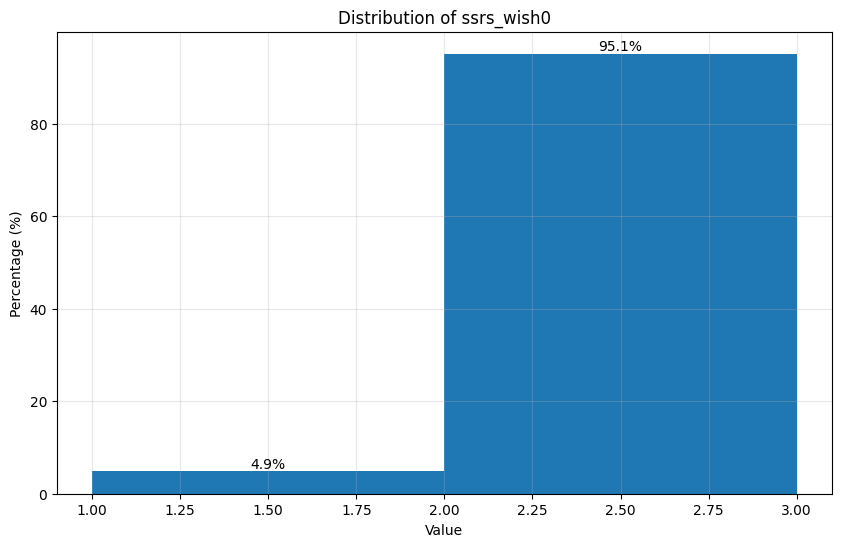

In [98]:
import matplotlib.pyplot as plt

# Create the histogram with percentages
plt.figure(figsize=(10, 6))
weights = np.ones_like(selfreport_2018_2019.ssrs_wish0) / len(selfreport_2018_2019.ssrs_wish0) * 100

plt.hist(selfreport_2018_2019.ssrs_wish0, weights=weights, bins=range(1, 4))
plt.title('Distribution of ssrs_wish0')
plt.xlabel('Value')
plt.ylabel('Percentage (%)')
plt.grid(True, alpha=0.3)

# Add percentage labels on top of each bar
n_bins = plt.gca().patches
for patch in n_bins:
    percentage = patch.get_height()
    plt.text(patch.get_x() + patch.get_width()/2, percentage, 
             f'{percentage:.1f}%', 
             ha='center', 
             va='bottom')

plt.show()

In [176]:
# 'UserID',
# 'Year',
# 'Age',
# 'Sex',
# 'Marital',
# 'SigOther0',
# 'Child',
# 'Ethnicity',
# 'religious',
# 'EFE0',
# 'Neu0',
# 'depr0',
# 'deprTreat0',
# 'specTreat0_Medication',
# 'specTreat0_Psychotherapy',
# hours
# daysoff
# sleep24h
# sleepAve
# ssrs_wish



In [117]:
selfreport_2018_2019

,UserID,Year,Age,Sex,sexOrientation,Marital,SigOther0,Child,Ethnicity,BirthPlace,...,ssrs_kill4,ssrs_how4,ssrs_act4,ssrs_workout4,ssrs_carryout4,ssrs_Attempted4,ssrs_otherStopped4,ssrs_youStopped4,ssrs_stepsToward4,ssrs_suicTot4
0,400070,2018,28.0,2.0,1.0,2,1,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,400082,2018,26.0,2.0,1.0,1,2,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,400083,2018,27.0,2.0,1.0,2,1,2,1.0,179.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,400199,2018,28.0,2.0,1.0,2,1,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,400226,2018,28.0,1.0,1.0,2,1,2,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807,599816,2019,30.0,2.0,1.0,1,2,2,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3808,599865,2019,23.0,2.0,1.0,1,2,2,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3809,599891,2019,25.0,2.0,1.0,1,1,2,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3810,599957,2019,31.0,1.0,1.0,1,2,2,4.0,243.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 1. First select only the specified variables
selected_vars = [
    # Fixed characteristics
    'UserID', 'Year', 'Age', 'Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity',
    
    # Baseline psychological measures
    'Neu0', 'EFE0', 'depr0', 'deprTreat0',
    'specTreat0_Medication', 'specTreat0_Psychotherapy', 'specTreat0_Other',
    'specTreat0_Other_TEXT',
    
    # Time-varying variables
    'PHQtot0', 'PHQtot1', 'PHQtot2', 'PHQtot3', 'PHQtot4',
    'PHQ10above0', 'PHQ10above1', 'PHQ10above2', 'PHQ10above3', 'PHQ10above4',
    'sleep24h0', 'sleep24h1', 'sleep24h2', 'sleep24h3', 'sleep24h4',
    'sleepAve0', 'sleepAve1', 'sleepAve2', 'sleepAve3', 'sleepAve4',
    'SLE0', 'SLE1', 'SLE2', 'SLE3', 'SLE4',
    'ssrs_wish0', 'ssrs_wish1', 'ssrs_wish2', 'ssrs_wish3', 'ssrs_wish4',
    'rotation1', 'rotation2', 'rotation3', 'rotation4',
    'hours0', 'hours1', 'hours2', 'hours3', 'hours4',
    'daysoff1', 'daysoff2', 'daysoff3', 'daysoff4',
    'error1_1', 'error1_2', 'error1_3', 'error1_4'
]

# First, let's verify which variables are actually in your dataset
available_vars = [var for var in selected_vars if var in selfreport_2018_2019.columns]
missing_vars = [var for var in selected_vars if var not in selfreport_2018_2019.columns]

print("Missing variables:")
print(missing_vars)

# Select only available variables
df_selected = selfreport_2018_2019[available_vars]

# # Let's reshape one variable group at a time to avoid errors
# # Start with PHQ scores
# df_long = df_selected.melt(
#     id_vars=['UserID', 'Year', 'Age', 'Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity',
#              'Neu0', 'EFE0', 'depr0', 'deprTreat0',
#              'specTreat0_Medication', 'specTreat0_Psychotherapy', 'specTreat0_Other',
#              'specTreat0_Other_TEXT'],
#     value_vars=[f'PHQtot{i}' for i in range(5)],
#     var_name='period',
#     value_name='PHQtot'
# )

# # Extract period number
# df_long['period'] = df_long['period'].str.extract('(\d+)').astype(int)

# print("\nShape of reshaped data:")
# print(df_long.shape)
# print("\nFirst few rows:")
# print(df_long.head())

Missing variables:
[]

Shape of reshaped data:
(19060, 18)

First few rows:
   UserID  Year   Age  Sex  Marital  Child  SigOther0  Ethnicity  Neu0  EFE0  \
0  400070  2018  28.0  2.0        2      2          1        1.0  35.0   9.0   
1  400082  2018  26.0  2.0        1      2          2        1.0  34.0  19.0   
2  400083  2018  27.0  2.0        2      2          1        1.0  29.0  24.0   
3  400199  2018  28.0  2.0        2      2          1        1.0  26.0   5.0   
4  400226  2018  28.0  1.0        2      2          1        4.0  13.0   9.0   

   depr0  deprTreat0  specTreat0_Medication  specTreat0_Psychotherapy  \
0      1         1.0                    1.0                       1.0   
1      1         1.0                    1.0                       1.0   
2      2         NaN                    NaN                       NaN   
3      2         NaN                    NaN                       NaN   
4      2         NaN                    NaN                       NaN   

   s

In [105]:
# Define fixed and time-varying variables
fixed_vars = [
    'UserID', 'Year', 'Age', 'Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity',
    'Neu0', 'EFE0', 'depr0', 'deprTreat0',
    'specTreat0_Medication', 'specTreat0_Psychotherapy', 'specTreat0_Other',
    'specTreat0_Other_TEXT'
]

time_varying_vars = {
    'PHQtot': [f'PHQtot{i}' for i in range(5)],
    'PHQ10above': [f'PHQ10above{i}' for i in range(5)],
    'sleep24h': [f'sleep24h{i}' for i in range(5)],
    'sleepAve': [f'sleepAve{i}' for i in range(5)],
    'SLE': [f'SLE{i}' for i in range(5)],
    'ssrs_wish': [f'ssrs_wish{i}' for i in range(5)],
    'rotation': [f'rotation{i}' for i in range(1, 5)],
    'hours': [f'hours{i}' for i in range(5)],
    'daysoff': [f'daysoff{i}' for i in range(1, 5)],
    'error1': [f'error1_{i}' for i in range(1, 5)]
}

# Verify available variables
available_fixed = [var for var in fixed_vars if var in selfreport_2018_2019.columns]
available_time_varying = {k: [var for var in v if var in selfreport_2018_2019.columns] 
                         for k, v in time_varying_vars.items()}

# First melt for the first time-varying variable to create base dataset
first_var = list(time_varying_vars.keys())[0]
df_long = df_selected.melt(
    id_vars=available_fixed,
    value_vars=available_time_varying[first_var],
    var_name='period',
    value_name=first_var
)

# Extract period number from first reshape
df_long['period'] = df_long['period'].str.extract('(\d+)').astype(int)

# Melt and merge remaining time-varying variables
for var_name, var_list in list(available_time_varying.items())[1:]:
    temp_df = df_selected.melt(
        id_vars=available_fixed,
        value_vars=var_list,
        var_name='period',
        value_name=var_name
    )
    temp_df['period'] = temp_df['period'].str.extract('(\d+)').astype(int)
    
    df_long = df_long.merge(
        temp_df,
        on=['period'] + available_fixed,
        how='outer'
    )

# Sort the final dataset
df_long = df_long.sort_values(['UserID', 'Year', 'period']).reset_index(drop=True)

# Print summary
print("Original shape:", selfreport_2018_2019.shape)
print("Long format shape:", df_long.shape)
print("\nMissing variables from original list:")
all_missing = [var for var in selected_vars if var not in selfreport_2018_2019.columns]
print(all_missing)
print("\nFirst few rows of reshaped data:")
print(df_long.head())

# Display column names in new dataset
print("\nColumns in reshaped dataset:")
print(df_long.columns.tolist())

Original shape: (3812, 173)
Long format shape: (68616, 27)

Missing variables from original list:
[]

First few rows of reshaped data:
   UserID  Year   Age  Sex  Marital  Child  SigOther0  Ethnicity  Neu0  EFE0  \
0  400070  2018  28.0  2.0        2      2          1        1.0  35.0   9.0   
1  400070  2018  28.0  2.0        2      2          1        1.0  35.0   9.0   
2  400070  2018  28.0  2.0        2      2          1        1.0  35.0   9.0   
3  400070  2018  28.0  2.0        2      2          1        1.0  35.0   9.0   
4  400070  2018  28.0  2.0        2      2          1        1.0  35.0   9.0   

   ...  PHQtot  PHQ10above  sleep24h  sleepAve  SLE ssrs_wish  rotation  \
0  ...     0.0         NaN       NaN       7.0  0.0       2.0       NaN   
1  ...     7.0         NaN       NaN       6.0  0.0       2.0       2.0   
2  ...     7.0         NaN       NaN       6.0  0.0       2.0       2.0   
3  ...     7.0         NaN       NaN       6.0  0.0       2.0       2.0   
4  ...   

In [118]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. First select only the specified variables
selected_vars = [
    # Fixed characteristics
    'UserID', 'Year', 'Age', 'Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity',
    
    # Baseline psychological measures
    'Neu0', 'EFE0', 'depr0', 'deprTreat0',
    'specTreat0_Medication', 'specTreat0_Psychotherapy', 'specTreat0_Other',
    'specTreat0_Other_TEXT',
    
    # Time-varying variables
    'PHQtot0', 'PHQtot1', 'PHQtot2', 'PHQtot3', 'PHQtot4',
    'PHQ10above0', 'PHQ10above1', 'PHQ10above2', 'PHQ10above3', 'PHQ10above4',
    'sleep24h0', 'sleep24h1', 'sleep24h2', 'sleep24h3', 'sleep24h4',
    'sleepAve0', 'sleepAve1', 'sleepAve2', 'sleepAve3', 'sleepAve4',
    'SLE0', 'SLE1', 'SLE2', 'SLE3', 'SLE4',
    'ssrs_wish0', 'ssrs_wish1', 'ssrs_wish2', 'ssrs_wish3', 'ssrs_wish4',
    'rotation1', 'rotation2', 'rotation3', 'rotation4',
    'hours0', 'hours1', 'hours2', 'hours3', 'hours4',
    'daysoff1', 'daysoff2', 'daysoff3', 'daysoff4',
    'error1_1', 'error1_2', 'error1_3', 'error1_4'
]

# First, let's verify which variables are actually in your dataset
available_vars = [var for var in selected_vars if var in selfreport_2018_2019.columns]
missing_vars = [var for var in selected_vars if var not in selfreport_2018_2019.columns]

print("Missing variables:")
print(missing_vars)

# Select only available variables
df_selected = selfreport_2018_2019[available_vars]

# Define fixed and time-varying variables
fixed_vars = [
    'UserID', 'Year', 'Age', 'Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity',
    'Neu0', 'EFE0', 'depr0', 'deprTreat0',
    'specTreat0_Medication', 'specTreat0_Psychotherapy', 'specTreat0_Other',
    'specTreat0_Other_TEXT'
]

time_varying_vars = {
    'PHQtot': [f'PHQtot{i}' for i in range(5)],
    'PHQ10above': [f'PHQ10above{i}' for i in range(5)],
    'sleep24h': [f'sleep24h{i}' for i in range(5)],
    'sleepAve': [f'sleepAve{i}' for i in range(5)],
    'SLE': [f'SLE{i}' for i in range(5)],
    'ssrs_wish': [f'ssrs_wish{i}' for i in range(5)],
    'rotation': [f'rotation{i}' for i in range(1, 5)],
    'hours': [f'hours{i}' for i in range(5)],
    'daysoff': [f'daysoff{i}' for i in range(1, 5)],
    'error1': [f'error1_{i}' for i in range(1, 5)]
}

# Verify available variables
available_fixed = [var for var in fixed_vars if var in selfreport_2018_2019.columns]
available_time_varying = {k: [var for var in v if var in selfreport_2018_2019.columns] 
                         for k, v in time_varying_vars.items()}

# First melt for the first time-varying variable to create base dataset
first_var = list(time_varying_vars.keys())[0]
df_long = df_selected.melt(
    id_vars=available_fixed,
    value_vars=available_time_varying[first_var],
    var_name='period',
    value_name=first_var
)

# Extract period number from first reshape
df_long['period'] = df_long['period'].str.extract('(\d+)').astype(int)

# Melt and merge remaining time-varying variables
for var_name, var_list in list(available_time_varying.items())[1:]:
    temp_df = df_selected.melt(
        id_vars=available_fixed,
        value_vars=var_list,
        var_name='period',
        value_name=var_name
    )
    temp_df['period'] = temp_df['period'].str.extract('(\d+)').astype(int)
    
    df_long = df_long.merge(
        temp_df,
        on=['period'] + available_fixed,
        how='outer'
    )

# Create balanced panel

# 1. Count periods per UserID
periods_per_user = df_long.groupby('UserID')['period'].nunique()

# 2. Get UserIDs with exactly 5 periods
complete_users = periods_per_user[periods_per_user == 5].index

# 3. Filter the dataset to keep only users with all 5 periods
df_long_balanced = df_long[df_long['UserID'].isin(complete_users)].copy()

# 4. Verify the balance
balance_check = df_long_balanced.groupby('UserID')['period'].nunique()

# 5. Print summary statistics
print("\nBalance check:")
print(f"Total number of users in balanced panel: {len(complete_users)}")
print(f"Original number of users: {df_long['UserID'].nunique()}")
print(f"Number of users dropped: {df_long['UserID'].nunique() - len(complete_users)}")

# 6. Verify periods for each user
period_counts = df_long_balanced.groupby(['UserID'])['period'].value_counts().unstack()
print("\nPeriod distribution per user (first few rows):")
print(period_counts.head())

# Sort the final balanced dataset
df_long_balanced = df_long_balanced.sort_values(['UserID', 'Year', 'period']).reset_index(drop=True)

# Final shape
print("\nFinal balanced panel shape:", df_long_balanced.shape)

# Quick verification of balance
print("\nVerification of balance:")
for period in range(5):
    count = len(df_long_balanced[df_long_balanced['period'] == period])
    print(f"Period {period}: {count} observations")

# Display columns in final dataset
print("\nColumns in final balanced dataset:")
print(df_long_balanced.columns.tolist())

Missing variables:
[]

Balance check:
Total number of users in balanced panel: 0
Original number of users: 3812
Number of users dropped: 3812

Period distribution per user (first few rows):
Empty DataFrame
Columns: []
Index: []

Final balanced panel shape: (0, 27)

Verification of balance:
Period 0: 0 observations
Period 1: 0 observations
Period 2: 0 observations
Period 3: 0 observations
Period 4: 0 observations

Columns in final balanced dataset:
['UserID', 'Year', 'Age', 'Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity', 'Neu0', 'EFE0', 'depr0', 'deprTreat0', 'specTreat0_Medication', 'specTreat0_Psychotherapy', 'specTreat0_Other', 'specTreat0_Other_TEXT', 'period', 'PHQtot', 'PHQ10above', 'sleep24h', 'sleepAve', 'SLE', 'ssrs_wish', 'rotation', 'hours', 'daysoff', 'error1']


In [125]:
import pandas as pd
import numpy as np

# 1. Split variables into groups based on their period structure
# Group 1: Variables with periods 0-4
time_varying_group1 = {
    'PHQtot': ['PHQtot0', 'PHQtot1', 'PHQtot2', 'PHQtot3', 'PHQtot4'],
    'PHQ10above': ['PHQ10above0', 'PHQ10above1', 'PHQ10above2', 'PHQ10above3', 'PHQ10above4'],
    'sleep24h': ['sleep24h0', 'sleep24h1', 'sleep24h2', 'sleep24h3', 'sleep24h4'],
    'sleepAve': ['sleepAve0', 'sleepAve1', 'sleepAve2', 'sleepAve3', 'sleepAve4'],
    'SLE': ['SLE0', 'SLE1', 'SLE2', 'SLE3', 'SLE4'],
    'ssrs_wish': ['ssrs_wish0', 'ssrs_wish1', 'ssrs_wish2', 'ssrs_wish3', 'ssrs_wish4'],
    'hours': ['hours0', 'hours1', 'hours2', 'hours3', 'hours4']
}

# Group 2: Variables with periods 1-4
time_varying_group2 = {
    'rotation': ['rotation1', 'rotation2', 'rotation3', 'rotation4'],
    'daysoff': ['daysoff1', 'daysoff2', 'daysoff3', 'daysoff4'],
    'error1': ['error1_1', 'error1_2', 'error1_3', 'error1_4']
}

# Fixed variables
fixed_vars = [
    'UserID', 'Year', 'Age', 'Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity',
    'Neu0', 'EFE0', 'depr0', 'deprTreat0',
    'specTreat0_Medication', 'specTreat0_Psychotherapy', 'specTreat0_Other',
    'specTreat0_Other_TEXT'
]

# 2. Create fixed variables dataset
df_fixed = selfreport_2018_2019[fixed_vars].copy()

# 3. Function to reshape time-varying variables
def reshape_to_long(df, var_group, var_list):
    df_long = df[['UserID'] + var_list].melt(
        id_vars=['UserID'],
        value_vars=var_list,
        var_name='period',
        value_name=var_group
    )
    
    # Extract period number
    if var_group == 'error1':
        df_long['period'] = df_long['period'].str.extract('_(\d+)').astype(int)
    else:
        df_long['period'] = df_long['period'].str.extract('(\d+)').astype(int)
    
    return df_long

# 4. Process Group 1 variables (0-4)
panel_dfs1 = []
for var_group, var_list in time_varying_group1.items():
    df_temp = reshape_to_long(selfreport_2018_2019, var_group, var_list)
    panel_dfs1.append(df_temp)
    print(f"Processed {var_group}: {len(var_list)} periods found")

# Merge Group 1 variables
df_panel1 = panel_dfs1[0]
for df in panel_dfs1[1:]:
    df_panel1 = df_panel1.merge(df, on=['UserID', 'period'], how='outer')

# 5. Process Group 2 variables (1-4)
panel_dfs2 = []
for var_group, var_list in time_varying_group2.items():
    df_temp = reshape_to_long(selfreport_2018_2019, var_group, var_list)
    panel_dfs2.append(df_temp)
    print(f"Processed {var_group}: {len(var_list)} periods found")

# Merge Group 2 variables
df_panel2 = panel_dfs2[0]
for df in panel_dfs2[1:]:
    df_panel2 = df_panel2.merge(df, on=['UserID', 'period'], how='outer')

# 6. Merge both groups
# For period 0, we'll have NAs for Group 2 variables
df_panel = df_panel1.merge(df_panel2, on=['UserID', 'period'], how='outer')

# 7. Identify users with complete data for Group 1 variables (0-4)
period_counts = df_panel.groupby('UserID')['period'].nunique()
complete_users = period_counts[period_counts == 5].index
print(f"\nUsers with complete data (5 periods): {len(complete_users)}")

# 8. Create balanced panel
df_balanced = df_panel[df_panel['UserID'].isin(complete_users)].copy()

# 9. Merge with fixed variables
final_dataset = df_balanced.merge(df_fixed, on='UserID', how='left')

# 10. Sort and clean
final_dataset = final_dataset.sort_values(['UserID', 'period']).reset_index(drop=True)

# Verification
print("\nVerification of final dataset:")
print(f"Total observations: {len(final_dataset)}")
print("\nObservations per period:")
print(final_dataset.groupby('period').size())

# Check if each user has all periods
user_period_check = final_dataset.groupby('UserID')['period'].nunique()
print("\nVerification of periods per user:")
print(user_period_check.value_counts())

print("\nSample of final dataset (first few rows):")
print(final_dataset.head())

# Save results
print(f"\nFinal number of users in balanced panel: {len(complete_users)}")

Processed PHQtot: 5 periods found
Processed PHQ10above: 5 periods found
Processed sleep24h: 5 periods found
Processed sleepAve: 5 periods found
Processed SLE: 5 periods found
Processed ssrs_wish: 5 periods found
Processed hours: 5 periods found
Processed rotation: 4 periods found
Processed daysoff: 4 periods found
Processed error1: 4 periods found

Users with complete data (5 periods): 0

Verification of final dataset:
Total observations: 0

Observations per period:
Series([], dtype: int64)

Verification of periods per user:
Series([], Name: count, dtype: int64)

Sample of final dataset (first few rows):
Empty DataFrame
Columns: [UserID, period, PHQtot, PHQ10above, sleep24h, sleepAve, SLE, ssrs_wish, hours, rotation, daysoff, error1, Year, Age, Sex, Marital, Child, SigOther0, Ethnicity, Neu0, EFE0, depr0, deprTreat0, specTreat0_Medication, specTreat0_Psychotherapy, specTreat0_Other, specTreat0_Other_TEXT]
Index: []

[0 rows x 27 columns]

Final number of users in balanced panel: 0


In [127]:
import pandas as pd
import numpy as np

# 1. First handle the main time-varying variables (0-4)
time_varying_group1 = {
    'PHQtot': ['PHQtot0', 'PHQtot1', 'PHQtot2', 'PHQtot3', 'PHQtot4'],
    'PHQ10above': ['PHQ10above0', 'PHQ10above1', 'PHQ10above2', 'PHQ10above3', 'PHQ10above4'],
    'sleep24h': ['sleep24h0', 'sleep24h1', 'sleep24h2', 'sleep24h3', 'sleep24h4'],
    'sleepAve': ['sleepAve0', 'sleepAve1', 'sleepAve2', 'sleepAve3', 'sleepAve4'],
    'SLE': ['SLE0', 'SLE1', 'SLE2', 'SLE3', 'SLE4'],
    'ssrs_wish': ['ssrs_wish0', 'ssrs_wish1', 'ssrs_wish2', 'ssrs_wish3', 'ssrs_wish4'],
    'hours': ['hours0', 'hours1', 'hours2', 'hours3', 'hours4']
}

# Function to reshape time-varying variables
def reshape_to_long(df, var_group, var_list):
    df_long = df[['UserID'] + var_list].melt(
        id_vars=['UserID'],
        value_vars=var_list,
        var_name='period',
        value_name=var_group
    )
    df_long['period'] = df_long['period'].str.extract('(\d+)').astype(int)
    return df_long

# Create long format for each variable
panel_dfs = []
for var_group, var_list in time_varying_group1.items():
    df_temp = reshape_to_long(selfreport_2018_2019, var_group, var_list)
    panel_dfs.append(df_temp)
    print(f"Processed {var_group}")

# Merge all group 1 variables
df_panel = panel_dfs[0]
for df in panel_dfs[1:]:
    df_panel = df_panel.merge(df, on=['UserID', 'period'], how='outer')

# Handle variables with periods 1-4
time_varying_group2 = {
    'rotation': ['rotation1', 'rotation2', 'rotation3', 'rotation4'],
    'daysoff': ['daysoff1', 'daysoff2', 'daysoff3', 'daysoff4'],
    'error1': ['error1_1', 'error1_2', 'error1_3', 'error1_4']
}

# Process group 2 variables
for var_group, var_list in time_varying_group2.items():
    df_temp = reshape_to_long(selfreport_2018_2019, var_group, var_list)
    df_panel = df_panel.merge(df_temp, on=['UserID', 'period'], how='outer')
    print(f"Processed {var_group}")

# Get fixed variables
fixed_vars = [
    'UserID', 'Year', 'Age', 'Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity',
    'Neu0', 'EFE0', 'depr0', 'deprTreat0',
    'specTreat0_Medication', 'specTreat0_Psychotherapy', 'specTreat0_Other',
    'specTreat0_Other_TEXT'
]

# Add fixed variables
df_panel = df_panel.merge(selfreport_2018_2019[fixed_vars], on='UserID', how='left')

# Sort the dataset
df_panel = df_panel.sort_values(['UserID', 'period']).reset_index(drop=True)

# Print summary statistics
print("\nDataset Information:")
print(f"Number of unique users: {df_panel['UserID'].nunique()}")
print(f"Total observations: {len(df_panel)}")
print("\nObservations per period:")
print(df_panel.groupby('period').size())

# Display sample of final dataset
print("\nSample of final dataset (first few rows):")
print(df_panel[['UserID', 'period', 'PHQtot', 'PHQ10above']].head(15))

# Save if needed
# df_panel.to_csv('balanced_panel.csv', index=False)

Processed PHQtot
Processed PHQ10above
Processed sleep24h
Processed sleepAve
Processed SLE
Processed ssrs_wish
Processed hours
Processed rotation
Processed daysoff
Processed error1

Dataset Information:
Number of unique users: 3812
Total observations: 68616

Observations per period:
period
0      3812
1     15248
2      3812
3      3812
4      3812
10    19060
24    19060
dtype: int64

Sample of final dataset (first few rows):
    UserID  period  PHQtot  PHQ10above
0   400070       0     0.0         NaN
1   400070       1     7.0         NaN
2   400070       1     7.0         NaN
3   400070       1     7.0         NaN
4   400070       1     7.0         NaN
5   400070       2    10.0         NaN
6   400070       3     NaN         NaN
7   400070       4     NaN         NaN
8   400070      10     NaN         0.0
9   400070      10     NaN         0.0
10  400070      10     NaN         1.0
11  400070      10     NaN         NaN
12  400070      10     NaN         NaN
13  400070      24     N

<Axes: >

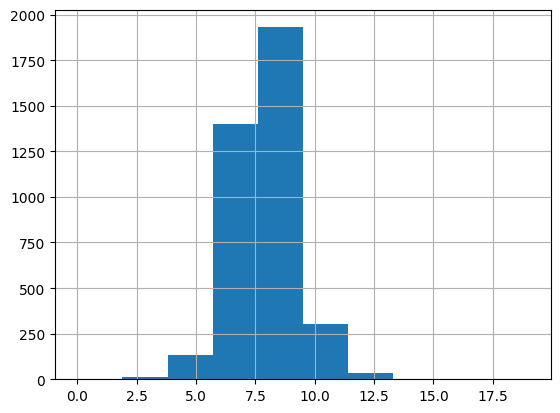

In [153]:
selfreport_2018_2019.sleep24h0.hist()

In [155]:
def reshape_to_long(df, var_group, var_list):
    # First, verify which columns actually exist in the dataset
    existing_vars = [var for var in var_list if var in df.columns]
    
    print(f"\nChecking {var_group}:")
    print(f"Expected variables: {var_list}")
    print(f"Found variables: {existing_vars}")
    
    df_long = df[['UserID'] + existing_vars].melt(
        id_vars=['UserID'],
        value_vars=existing_vars,
        var_name='period',
        value_name=var_group
    )
    
    # Extract period number based on variable pattern
    if var_group == 'error1':
        df_long['period'] = df_long['period'].str.extract('_(\d+)').astype(int)
    elif var_group in ['rotation', 'daysoff']:  # Variables that start from period 1
        df_long['period'] = df_long['period'].str.extract('(\d+)').astype(int)
    else:  # Standard variables with periods 0-4
        df_long['period'] = df_long['period'].str.extract('(\d+)').astype(int)
    
    # Verify period range
    print(f"Periods found: {sorted(df_long['period'].unique())}")
    
    return df_long[df_long['period'].between(0, 4)]

# Modify the variable groups to explicitly show their patterns
time_varying_vars = {
    # Standard pattern (0-4)
    'PHQtot': [f'PHQtot{i}' for i in range(5)],
    'PHQ10above': [f'PHQ10above{i}' for i in range(5)],
    'sleep24h': [f'sleep24h{i}' for i in range(5)],
    'sleepAve': [f'sleepAve{i}' for i in range(5)],
    'SLE': [f'SLE{i}' for i in range(5)],
    'ssrs_wish': [f'ssrs_wish{i}' for i in range(5)],
    'hours': [f'hours{i}' for i in range(5)],
    
    # Pattern starting at 1 (1-4)
    'rotation': [f'rotation{i}' for i in range(1, 5)],
    'daysoff': [f'daysoff{i}' for i in range(1, 5)],
    
    # Underscore pattern
    'error1': [f'error1_{i}' for i in range(1, 5)]
}

# Let's check one variable from each pattern as a test
test_vars = ['PHQtot', 'rotation', 'error1']
for var in test_vars:
    test_df = reshape_to_long(selfreport_2018_2019, var, time_varying_vars[var])
    print(f"\nSample of {var} reshape:")
    print(test_df.head())


Checking PHQtot:
Expected variables: ['PHQtot0', 'PHQtot1', 'PHQtot2', 'PHQtot3', 'PHQtot4']
Found variables: ['PHQtot0', 'PHQtot1', 'PHQtot2', 'PHQtot3', 'PHQtot4']
Periods found: [0, 1, 2, 3, 4]

Sample of PHQtot reshape:
   UserID  period  PHQtot
0  400070       0     0.0
1  400082       0     3.0
2  400083       0     5.0
3  400199       0     4.0
4  400226       0     1.0

Checking rotation:
Expected variables: ['rotation1', 'rotation2', 'rotation3', 'rotation4']
Found variables: ['rotation1', 'rotation2', 'rotation3', 'rotation4']
Periods found: [1, 2, 3, 4]

Sample of rotation reshape:
   UserID  period  rotation
0  400070       1       2.0
1  400082       1       3.0
2  400083       1       1.0
3  400199       1       1.0
4  400226       1       1.0

Checking error1:
Expected variables: ['error1_1', 'error1_2', 'error1_3', 'error1_4']
Found variables: ['error1_1', 'error1_2', 'error1_3', 'error1_4']
Periods found: [1, 2, 3, 4]

Sample of error1 reshape:
   UserID  period  erro

In [166]:
# Function to process each time-varying variable
def create_period_data(df, var_name, start_period=0, end_period=4):
    period_data = []
    for period in range(start_period, end_period + 1):
        # Handle different naming conventions
        if var_name == 'error1':
            col_name = f'{var_name}_{period}'
        else:
            col_name = f'{var_name}{period}'
        
        # Get data for this period
        period_df = df[['UserID', col_name]].copy()
        period_df['period'] = period
        period_df = period_df.rename(columns={col_name: var_name})
        period_data.append(period_df)
    
    # Combine all periods
    var_panel = pd.concat(period_data)
    return var_panel.sort_values(['UserID', 'period']).reset_index(drop=True)

# Process variables with periods 0-4
vars_0_4 = ['sleep24h', 'PHQtot', 'PHQ10above', 'sleepAve', 'SLE', 'ssrs_wish', 'hours']
panel_data_list = []

for var in vars_0_4:
    print(f"Processing {var}")
    var_panel = create_period_data(selfreport_2018_2019, var, 0, 4)
    panel_data_list.append(var_panel)

# Process variables with periods 1-4
vars_1_4 = ['rotation', 'daysoff']
for var in vars_1_4:
    print(f"Processing {var}")
    var_panel = create_period_data(selfreport_2018_2019, var, 1, 4)
    panel_data_list.append(var_panel)

# Process error1 separately (different naming convention)
print("Processing error1")
error_panel = create_period_data(selfreport_2018_2019, 'error1', 1, 4)
panel_data_list.append(error_panel)

# Create base panel structure
users = selfreport_2018_2019['UserID'].unique()
base_panel = pd.DataFrame([(user, period) for user in users for period in range(5)],
                         columns=['UserID', 'period'])

# Merge all variables into the base panel
panel_data = base_panel.copy()
for var_panel in panel_data_list:
    var_name = var_panel.columns[1]  # Get variable name (excluding UserID and period)
    panel_data = panel_data.merge(
        var_panel[['UserID', 'period', var_name]], 
        on=['UserID', 'period'], 
        how='left'
    )

# Add fixed variables
fixed_vars = [
    'Year', 'Age', 'Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity',
    'Neu0', 'EFE0', 'depr0', 'deprTreat0',
    'specTreat0_Medication', 'specTreat0_Psychotherapy', 'specTreat0_Other',
    'specTreat0_Other_TEXT'
]
panel_data = panel_data.merge(selfreport_2018_2019[['UserID'] + fixed_vars], on='UserID', how='left')

# Sort final dataset
panel_data = panel_data.sort_values(['UserID', 'period']).reset_index(drop=True)

# Verify results
print("\nFinal panel shape:", panel_data.shape)
print("\nSample of final panel data:")
print(panel_data.head(10))

# Verify data for each variable
for var in vars_0_4:
    print(f"\n{var} data by period:")
    for period in range(5):
        count = panel_data[panel_data['period'] == period][var].notna().sum()
        print(f"Period {period}: {count} non-null values")

Processing sleep24h
Processing PHQtot
Processing PHQ10above
Processing sleepAve
Processing SLE
Processing ssrs_wish
Processing hours
Processing rotation
Processing daysoff
Processing error1

Final panel shape: (19060, 27)

Sample of final panel data:
   UserID  period  sleep24h  PHQtot  PHQ10above  sleepAve  SLE  ssrs_wish  \
0  400070       0       7.0     0.0         0.0       7.0  0.0        2.0   
1  400070       1       6.0     7.0         0.0       6.0  0.0        2.0   
2  400070       2       5.0    10.0         1.0       6.0  0.0        2.0   
3  400070       3       NaN     NaN         NaN       NaN  NaN        NaN   
4  400070       4       NaN     NaN         NaN       NaN  NaN        NaN   
5  400082       0       6.0     3.0         0.0       6.0  1.0        1.0   
6  400082       1       6.0    15.0         1.0       6.0  0.0        2.0   
7  400082       2       8.0     7.0         0.0       7.0  0.0        2.0   
8  400082       3       5.0    12.0         1.0       6.

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style for all plots
plt.style.use('seaborn')
sns.set_palette("husl")

def plot_variable_distributions(data, vars_list, periods=5):
    """Plot distributions for each variable across periods"""
    for var in vars_list:
        # Create figure with subplots for each period
        fig, axes = plt.subplots(1, periods, figsize=(20, 4))
        fig.suptitle(f'Distribution of {var} across periods', y=1.05)
        
        for period in range(periods):
            period_data = data[data['period'] == period][var].dropna()
            sns.histplot(period_data, ax=axes[period], kde=True)
            axes[period].set_title(f'Period {period}')
            axes[period].set_xlabel(var)
        
        plt.tight_layout()
        plt.show()

def plot_boxplots(data, vars_list):
    """Create boxplots for each variable by period"""
    for var in vars_list:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='period', y=var, data=data)
        plt.title(f'Distribution of {var} by Period')
        plt.show()

def plot_violin_plots(data, vars_list):
    """Create violin plots for each variable by period"""
    for var in vars_list:
        plt.figure(figsize=(12, 6))
        sns.violinplot(x='period', y=var, data=data)
        plt.title(f'Distribution of {var} by Period')
        plt.show()

def plot_correlation_matrix(data, vars_list):
    """Plot correlation matrix for variables"""
    plt.figure(figsize=(12, 10))
    correlation_matrix = data[vars_list].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

def plot_time_trends(data, vars_list):
    """Plot mean trends over time for each variable"""
    plt.figure(figsize=(12, 6))
    for var in vars_list:
        means = data.groupby('period')[var].mean()
        plt.plot(means.index, means.values, marker='o', label=var)
    
    plt.title('Mean Values Over Time')
    plt.xlabel('Period')
    plt.ylabel('Mean Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Define variable groups
continuous_vars = ['sleep24h', 'PHQtot', 'sleepAve', 'hours']
categorical_vars = ['rotation', 'PHQ10above', 'ssrs_wish']

# Run the analyses
print("Distribution plots for continuous variables:")
plot_variable_distributions(panel_data, continuous_vars)

print("\nBoxplots for continuous variables:")
plot_boxplots(panel_data, continuous_vars)

print("\nViolin plots for continuous variables:")
plot_violin_plots(panel_data, continuous_vars)

print("\nCorrelation matrix for continuous variables:")
plot_correlation_matrix(panel_data, continuous_vars)

print("\nTime trends for continuous variables:")
plot_time_trends(panel_data, continuous_vars)

# For categorical variables
def plot_categorical_distributions(data, vars_list):
    """Plot bar plots for categorical variables"""
    for var in vars_list:
        plt.figure(figsize=(15, 5))
        for period in range(5):
            plt.subplot(1, 5, period + 1)
            period_data = data[data['period'] == period][var].value_counts().sort_index()
            sns.barplot(x=period_data.index, y=period_data.values)
            plt.title(f'Period {period}')
            plt.xlabel(var)
        plt.tight_layout()
        plt.show()

print("\nDistributions for categorical variables:")
plot_categorical_distributions(panel_data, categorical_vars)

# Additional analyses

# 1. Pairplot for continuous variables
print("\nPairplot for continuous variables:")
sns.pairplot(panel_data[continuous_vars])
plt.show()

# 2. Time series plot with confidence intervals
plt.figure(figsize=(12, 6))
for var in continuous_vars:
    sns.lineplot(data=panel_data, x='period', y=var, label=var, ci=95)
plt.title('Time Series with 95% Confidence Intervals')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# 3. Density plots by period
for var in continuous_vars:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=panel_data, x=var, hue='period', common_norm=False)
    plt.title(f'Density Plot of {var} by Period')
    plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [173]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
differences 0.2.0 requires formulaic<0.4.0,>=0.3.4, but you have formulaic 1.0.2 which is incompatible.


<Axes: >

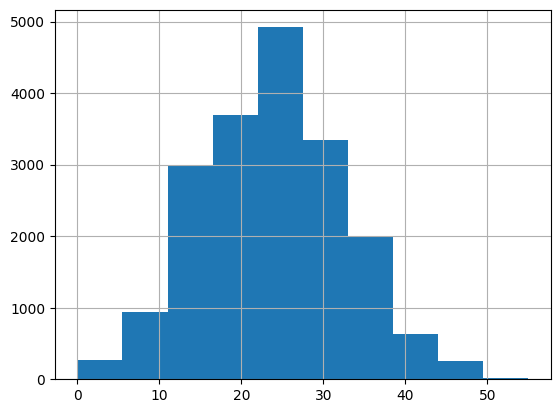

In [170]:
panel_data.Neu0.hist()

In [144]:
import pandas as pd
import numpy as np

def reshape_to_long(df, var_group, var_list):
    # Make sure we're using the correct period extraction for each variable
    df_long = df[['UserID'] + var_list].melt(
        id_vars=['UserID'],
        value_vars=var_list,
        var_name='period',
        value_name=var_group
    )
    
    # Extract the correct period number
    if var_group == 'error1':
        df_long['period'] = df_long['period'].str.extract('_(\d+)').astype(int)
    else:
        df_long['period'] = df_long['period'].str.extract('(\d+)').astype(int)
    
    # Remove any periods outside our range (0-4)
    df_long = df_long[df_long['period'].between(0, 4)]
    return df_long

# Define variable groups
time_varying_vars = {
    'PHQtot': ['PHQtot0', 'PHQtot1', 'PHQtot2', 'PHQtot3', 'PHQtot4'],
    'PHQ10above': ['PHQ10above0', 'PHQ10above1', 'PHQ10above2', 'PHQ10above3', 'PHQ10above4'],
    'sleep24h': ['sleep24h0', 'sleep24h1', 'sleep24h2', 'sleep24h3', 'sleep24h4'],
    'sleepAve': ['sleepAve0', 'sleepAve1', 'sleepAve2', 'sleepAve3', 'sleepAve4'],
    'SLE': ['SLE0', 'SLE1', 'SLE2', 'SLE3', 'SLE4'],
    'ssrs_wish': ['ssrs_wish0', 'ssrs_wish1', 'ssrs_wish2', 'ssrs_wish3', 'ssrs_wish4'],
    'hours': ['hours0', 'hours1', 'hours2', 'hours3', 'hours4'],
    'rotation': ['rotation1', 'rotation2', 'rotation3', 'rotation4'],
    'daysoff': ['daysoff1', 'daysoff2', 'daysoff3', 'daysoff4'],
    'error1': ['error1_1', 'error1_2', 'error1_3', 'error1_4']
}

# Create initial dataframe with UserID and period combinations
all_users = selfreport_2018_2019['UserID'].unique()
all_periods = range(5)  # 0 to 4
base_df = pd.DataFrame([(user, period) for user in all_users for period in all_periods],
                      columns=['UserID', 'period'])

# Process each time-varying variable and merge with base_df
panel_data = base_df.copy()
for var_group, var_list in time_varying_vars.items():
    print(f"Processing {var_group}")
    temp_df = reshape_to_long(selfreport_2018_2019, var_group, var_list)
    panel_data = panel_data.merge(temp_df[['UserID', 'period', var_group]], 
                                on=['UserID', 'period'], 
                                how='left')

# Add fixed variables
fixed_vars = [
    'UserID', 'Year', 'Age', 'Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity',
    'Neu0', 'EFE0', 'depr0', 'deprTreat0',
    'specTreat0_Medication', 'specTreat0_Psychotherapy', 'specTreat0_Other',
    'specTreat0_Other_TEXT'
]

panel_data = panel_data.merge(selfreport_2018_2019[fixed_vars], on='UserID', how='left')

# Sort the final dataset
panel_data = panel_data.sort_values(['UserID', 'period']).reset_index(drop=True)

# Print verification information
print("\nDataset Information:")
print(f"Number of unique users: {panel_data['UserID'].nunique()}")
print(f"Total observations: {len(panel_data)}")
print("\nObservations per period:")
print(panel_data.groupby('period').size())

# Display sample
print("\nSample of final dataset (first 15 rows):")
print(panel_data[['UserID', 'period', 'PHQtot', 'PHQ10above']].head(15))

# Verify structure
users_per_period = panel_data.groupby('period')['UserID'].nunique()
print("\nUnique users per period:")
print(users_per_period)

Processing PHQtot
Processing PHQ10above
Processing sleep24h
Processing sleepAve
Processing SLE
Processing ssrs_wish
Processing hours
Processing rotation
Processing daysoff
Processing error1

Dataset Information:
Number of unique users: 3812
Total observations: 19060

Observations per period:
period
0    3812
1    3812
2    3812
3    3812
4    3812
dtype: int64

Sample of final dataset (first 15 rows):
    UserID  period  PHQtot  PHQ10above
0   400070       0     0.0         NaN
1   400070       1     7.0         NaN
2   400070       2    10.0         NaN
3   400070       3     NaN         NaN
4   400070       4     NaN         NaN
5   400082       0     3.0         NaN
6   400082       1    15.0         NaN
7   400082       2     7.0         NaN
8   400082       3    12.0         NaN
9   400082       4    13.0         NaN
10  400083       0     5.0         NaN
11  400083       1    15.0         NaN
12  400083       2     NaN         NaN
13  400083       3     NaN         NaN
14  400083

In [148]:
panel_data.columns

Index(['UserID', 'period', 'PHQtot', 'PHQ10above', 'sleep24h', 'sleepAve',
       'SLE', 'ssrs_wish', 'hours', 'rotation', 'daysoff', 'error1', 'Year',
       'Age', 'Sex', 'Marital', 'Child', 'SigOther0', 'Ethnicity', 'Neu0',
       'EFE0', 'depr0', 'deprTreat0', 'specTreat0_Medication',
       'specTreat0_Psychotherapy', 'specTreat0_Other',
       'specTreat0_Other_TEXT'],
      dtype='object')

<Axes: >

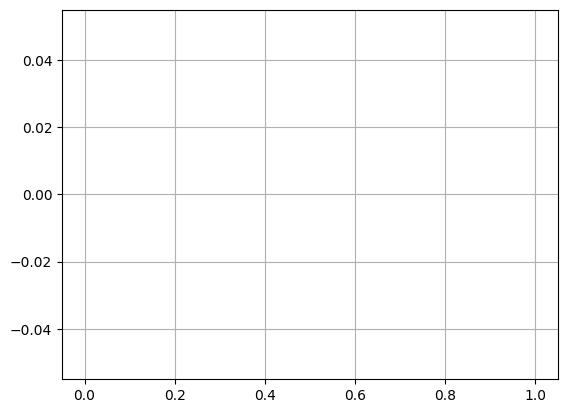

In [154]:
panel_data.PHQ10above.hist()

<Axes: >

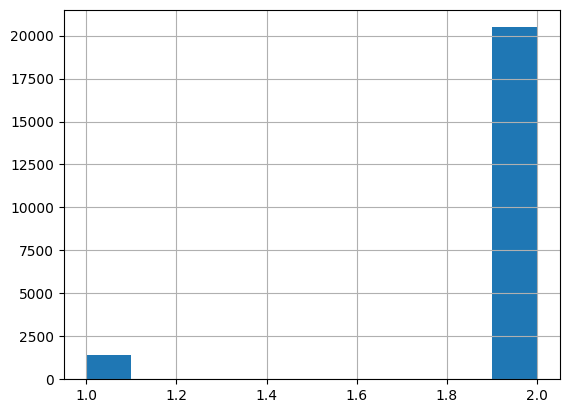

In [107]:
# keep relevant variables
df_long.ssrs_wish.hist()

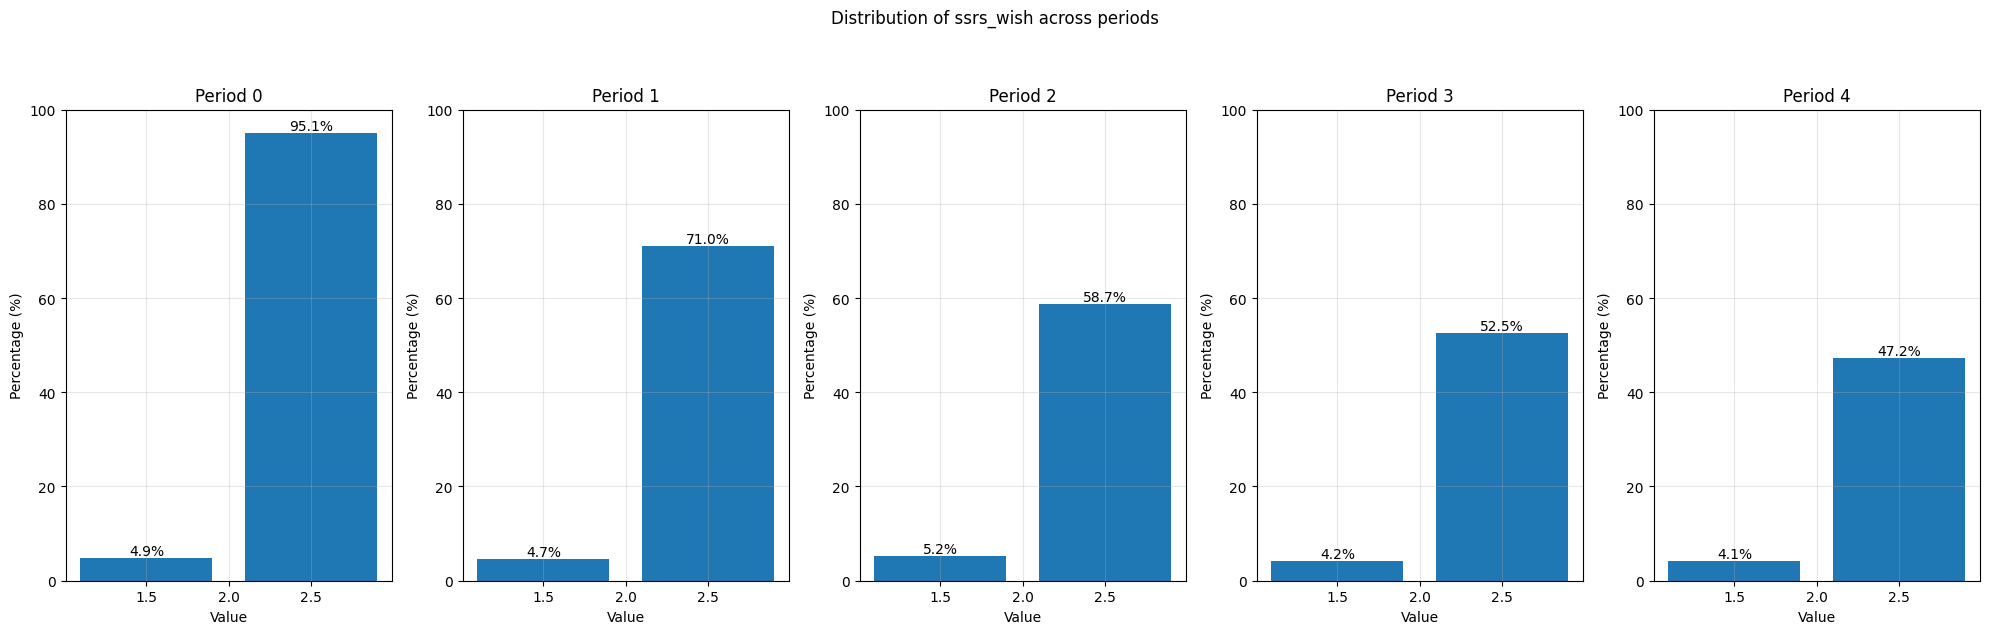


Summary of ssrs_wish by period:
         count      mean       std  min  25%  50%  75%  max
period                                                     
0       3812.0  1.950944  0.216013  1.0  2.0  2.0  2.0  2.0
1       2883.0  1.938259  0.240727  1.0  2.0  2.0  2.0  2.0
2       2433.0  1.919030  0.272845  1.0  2.0  2.0  2.0  2.0
3       2162.0  1.926457  0.261086  1.0  2.0  2.0  2.0  2.0
4       1957.0  1.919775  0.271710  1.0  2.0  2.0  2.0  2.0


In [141]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots for each period
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
fig.suptitle('Distribution of ssrs_wish across periods', y=1.05)

# Loop through periods
for period in range(5):
    period_data = panel_data[panel_data['period'] == period]['ssrs_wish']
    weights = np.ones_like(period_data) / len(period_data) * 100
    
    axes[period].hist(period_data, weights=weights, bins=range(1, 4), rwidth=0.8)
    axes[period].set_title(f'Period {period}')
    axes[period].set_xlabel('Value')
    axes[period].set_ylabel('Percentage (%)')
    axes[period].grid(True, alpha=0.3)
    
    # Add percentage labels on top of each bar
    for patch in axes[period].patches:
        percentage = patch.get_height()
        axes[period].text(patch.get_x() + patch.get_width()/2, percentage,
                         f'{percentage:.1f}%',
                         ha='center',
                         va='bottom')
    
    # Set consistent y-axis limits across all subplots
    axes[period].set_ylim(0, 100)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary of ssrs_wish by period:")
print(panel_data.groupby('period')['ssrs_wish'].describe())